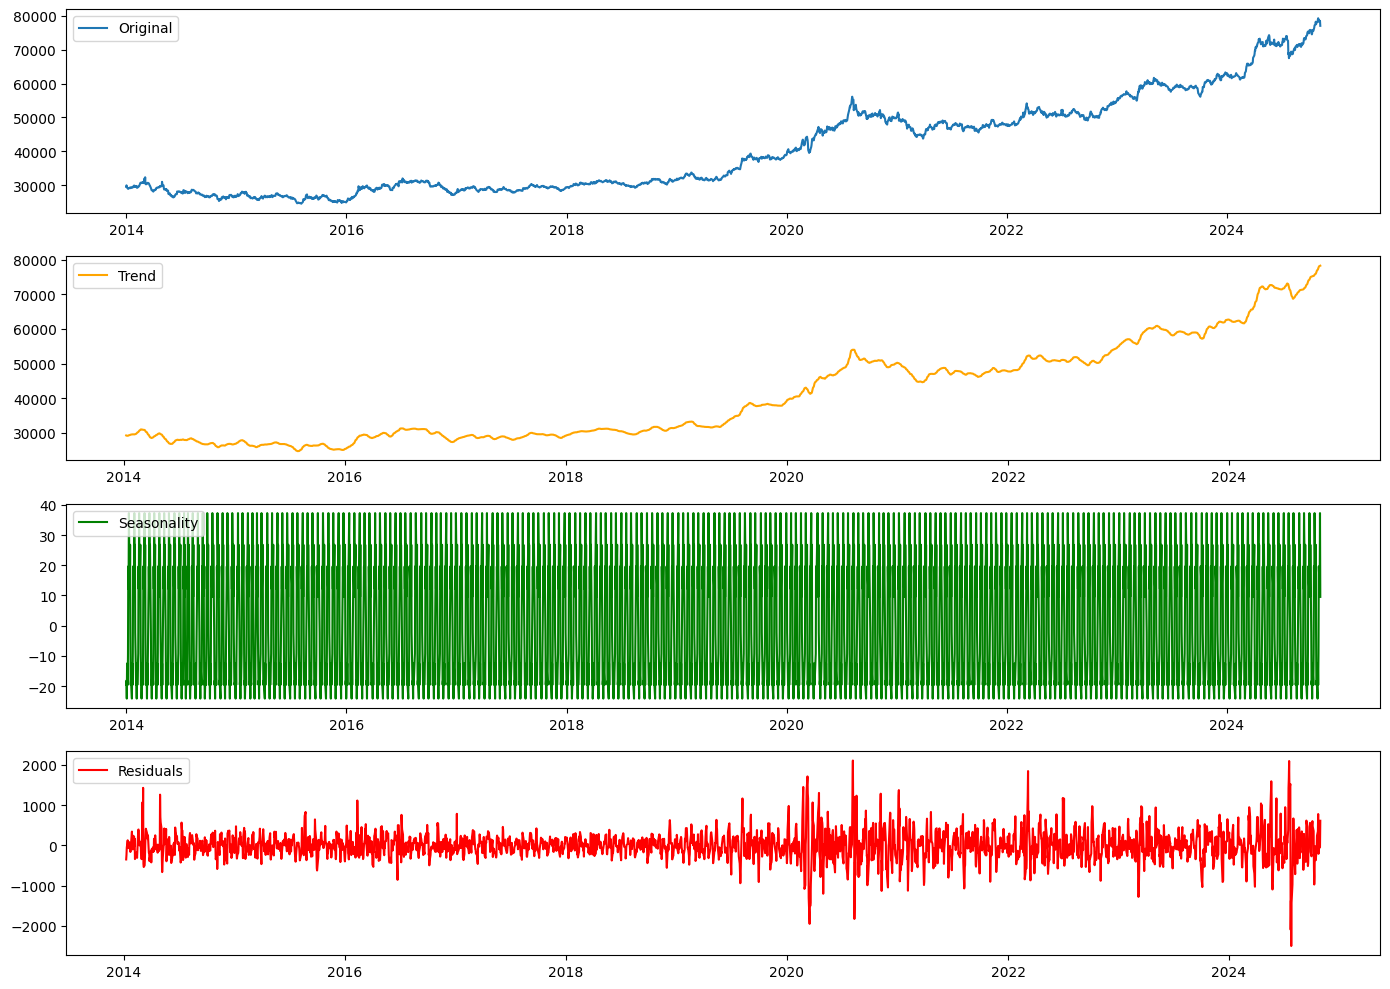

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 2: Load the Dataset
file_path = "/content/Gold_Price_DataSet.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Step 3: Preprocess the Data
df.columns = [col.strip() for col in df.columns]
date_col = df.columns[0]
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df.set_index(date_col, inplace=True)

# Drop non-numeric columns
df_numeric = df.select_dtypes(include='number')

# Ensure we have numeric data
if df_numeric.empty:
    raise ValueError("No numeric columns found!")

# Select first numeric column for decomposition
value_col = df_numeric.columns[0]
data = df_numeric[value_col].dropna()

# Step 4: Decompose the Time Series
# Assumes monthly data, adjust `period` accordingly (e.g., 12 for monthly, 4 for quarterly)
decomposition = seasonal_decompose(data, model='additive', period=12)

# Step 5: Plot Decomposition Results
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
